In [131]:
import matplotlib.pyplot as plt
import matplot2tikz
import pandas as pd
import os

In [132]:
baseline = pd.read_csv("../log/baseline_20251013.csv", names = ['dataset',  'test_fitness', 'seed','epoch', 'timing'])

In [133]:
slim = pd.read_csv('../../../../SLIM-GSGP/SlimShady/main/log/mut_step_real_2.csv', names=["algo", "mut_step","experiment_id",  "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

In [134]:
slm = pd.read_csv("../log/slm.csv")

In [186]:
slm_complete = pd.read_csv("../log/all_runs_parameters_merged.csv")

In [187]:
slm_complete.head()

,dataset,seed,n_neurons_added_sum,parameters
0,airfoil,0,144,4224
1,airfoil,1,144,4224
2,airfoil,2,168,5216
3,airfoil,3,108,2976
4,airfoil,4,132,3776


In [135]:
data_info = { "yatch" : '(0, 62)',
                   "airfoil" : '(103, 141)',
                   "concrete_slump" : '(0, 30)',
                   "concrete_strength" : '(2.3, 83)',
                   "ppb": '(0.5, 100)',
                    "bioav" : '(0.4, 100)',
                   "ld50" : '(0.25, 89000)'}

In [136]:
slim.mut_step.unique()

array(['(0, 62)', '(0, 10)', '(0, 100)', '(0, 0.1)', '(0, 1000)',
       '(0, 1)', '(0, 3)', '(103, 141)', '(0, 125.7)', '(0, 30)',
       '(0, 21.5)', '(2.3, 83)', '(0, 33.8)', '(0.5, 100)', '(0, 85)',
       '(0.4, 100)', '(0, 75)', '(0.25, 89000)', '(0, 775)'], dtype=object)

In [137]:
baseline_dropout = pd.read_csv("../log/baseline_dropout_20251013.csv", names = ['dataset',  'test_fitness', 'seed','epoch', 'timing'])
baseline_dropout_2 =  pd.read_csv("../log/baseline_dropout_20251014.csv", names = ['dataset',  'test_fitness', 'seed','epoch', 'timing'])
baseline_dropout = pd.concat((baseline_dropout, baseline_dropout_2))

In [138]:
baseline_dropout_01 =  pd.read_csv("../log/baseline_dropout_20251016.csv", names = ['dataset',  'test_fitness', 'seed','epoch', 'timing'])

In [139]:
baseline.dataset.value_counts(
)

dataset
bioav                30
ld50                 30
concrete_strength    24
airfoil              24
Name: count, dtype: int64

In [140]:
baseline_dropout.query("dataset in ['concrete_strength', 'airfoil'] and seed in [7, 14, 15, 22, 23, 6]")

,dataset,test_fitness,seed,epoch,timing
0,concrete_strength,19.078798,7,1000,1286.842850
1,concrete_strength,15.872239,6,1000,1291.670232
2,concrete_strength,23.152205,14,1000,1288.416214
3,concrete_strength,18.174944,15,1000,1293.809257
4,concrete_strength,21.913498,22,1000,1288.935829
5,concrete_strength,19.303843,23,1000,1291.780477
6,airfoil,34.898167,7,1000,1061.789012
7,airfoil,34.752563,6,1000,1068.241084
8,airfoil,96.008629,14,1000,1061.553306
9,airfoil,33.908329,15,1000,1071.165907


In [141]:
baseline3 = baseline_dropout.query("dataset in ['concrete_strength', 'airfoil'] and seed in [7, 14, 15, 22, 23, 6]").drop_duplicates(subset = ['dataset',  'seed'], keep = 'first')

In [142]:
baseline = pd.concat((baseline, baseline3))

In [143]:
baseline_dropout.drop_duplicates(subset = ['dataset',  'seed'], keep = 'last', inplace = True)

In [144]:
baseline_dropout.head()

,dataset,test_fitness,seed,epoch,timing
12,bioav,43.096611,7,1000,586.474877
13,bioav,38.323406,6,1000,587.216774
14,bioav,36.930355,0,1000,587.636144
15,bioav,59.349354,3,1000,588.251734
16,bioav,68.390892,5,1000,589.787528


In [208]:
tneat = pd.read_csv("../log/tensor neat.csv")
tneat2 = pd.read_csv("../log/tensorneat - ld50.csv")
tneat3 = pd.read_csv("../log/tensorneat - bioav.csv")
tneat3 = tneat3[tneat3['Name'].apply(lambda x: int(x.split('-')[-1]) < 30)]
tneat4 = pd.read_csv("../log/airfoil_runs_update.csv")
tneat = pd.concat((tneat, tneat2, tneat2.sample(1), tneat3, tneat3.sample(2), tneat4))

In [165]:
tneat.columns

Index(['Duration', 'Run ID', 'Name', 'compatibility_threshold', 'dataset',
       'generations', 'max_conns', 'max_nodes', 'pop_size', 'seed',
       'species_size', 'survival_threshold', 'elite_length', 'elite_rmse',
       'elite_size', 'final_model_test_rmse', 'final_model_train_rmse',
       'hidden_layers', 'iteration_time', 'test_rmse', 'train_rmse',
       'Source Type', 'Source Name', 'User', 'Status'],
      dtype='object')

In [147]:
tneat.species_size.unique()

array([10., nan])

In [148]:
tneat.head()

,Duration,Run ID,Name,compatibility_threshold,dataset,generations,max_conns,max_nodes,pop_size,seed,...,final_model_test_rmse,final_model_train_rmse,hidden_layers,iteration_time,test_rmse,train_rmse,Source Type,Source Name,User,Status
0,9.4min,96224eb768a7420fa5b1348ed6c3bd7e,tensorneat:concrete_strength:seed-29,2.5,concrete_strength,1000.0,640,192,100.0,29,...,6.890226,6.786598,15.0,0.515070,7.059199,6.786598,NaN,NaN,NaN,NaN
1,9.3min,1b0d105040254539a0db1a6cdfbf3a19,tensorneat:concrete_strength:seed-28,2.5,concrete_strength,1000.0,640,192,100.0,28,...,6.870596,6.763392,14.0,0.512412,7.119328,6.763392,NaN,NaN,NaN,NaN
2,9.0min,cee8ab1b7fe447e7bb8f15ac6eb17b94,tensorneat:concrete_strength:seed-27,2.5,concrete_strength,1000.0,640,192,100.0,27,...,6.710450,7.032411,13.0,0.510767,6.942312,7.032411,NaN,NaN,NaN,NaN
3,9.1min,721b85302879440a85fb5e773e226839,tensorneat:concrete_strength:seed-26,2.5,concrete_strength,1000.0,640,192,100.0,26,...,6.448058,6.816668,12.0,0.502488,6.504291,6.816668,NaN,NaN,NaN,NaN
4,8.9min,9f7ee07fefca48b493bccb7e21af57d5,tensorneat:concrete_strength:seed-25,2.5,concrete_strength,1000.0,640,192,100.0,25,...,6.987205,6.914213,11.0,0.495144,6.987205,6.914213,NaN,NaN,NaN,NaN


In [177]:
tneat.query("dataset == 'ld50'")

,Duration,Run ID,Name,compatibility_threshold,dataset,generations,max_conns,max_nodes,pop_size,seed,...,final_model_test_rmse,final_model_train_rmse,hidden_layers,iteration_time,test_rmse,train_rmse,Source Type,Source Name,User,Status
0,NaN,NaN,tensorneat:ld50:seed-9,NaN,ld50,NaN,626,627,NaN,9,...,NaN,NaN,NaN,NaN,2925.245361,2467.555176,NaN,NaN,NaN,NaN
1,NaN,NaN,tensorneat:ld50:seed-8,NaN,ld50,NaN,626,627,NaN,8,...,NaN,NaN,NaN,NaN,2546.804932,2573.716797,NaN,NaN,NaN,NaN
2,NaN,NaN,tensorneat:ld50:seed-7,NaN,ld50,NaN,626,627,NaN,7,...,NaN,NaN,NaN,NaN,2536.796143,2584.521973,NaN,NaN,NaN,NaN
3,NaN,NaN,tensorneat:ld50:seed-6,NaN,ld50,NaN,626,627,NaN,6,...,NaN,NaN,NaN,NaN,2352.584473,2611.055908,NaN,NaN,NaN,NaN
4,NaN,NaN,tensorneat:ld50:seed-5,NaN,ld50,NaN,626,627,NaN,5,...,NaN,NaN,NaN,NaN,3010.414307,2446.136230,NaN,NaN,NaN,NaN
5,NaN,NaN,tensorneat:ld50:seed-4,NaN,ld50,NaN,626,627,NaN,4,...,NaN,NaN,NaN,NaN,2800.100342,2506.089844,NaN,NaN,NaN,NaN
6,NaN,NaN,tensorneat:ld50:seed-3,NaN,ld50,NaN,626,627,NaN,3,...,NaN,NaN,NaN,NaN,2589.875000,2560.783691,NaN,NaN,NaN,NaN
7,NaN,NaN,tensorneat:ld50:seed-29,NaN,ld50,NaN,626,627,NaN,29,...,NaN,NaN,NaN,NaN,2846.158691,2493.307129,NaN,NaN,NaN,NaN
8,NaN,NaN,tensorneat:ld50:seed-28,NaN,ld50,NaN,626,627,NaN,28,...,NaN,NaN,NaN,NaN,2328.428467,2619.846924,NaN,NaN,NaN,NaN
9,NaN,NaN,tensorneat:ld50:seed-27,NaN,ld50,NaN,626,627,NaN,27,...,NaN,NaN,NaN,NaN,3139.745117,2412.866699,NaN,NaN,NaN,NaN


In [149]:
data = pd.read_csv('../log/20250916.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])

In [150]:
data2 = pd.read_csv('../log/20250925.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])

In [151]:
data = pd.concat((data, data2))

In [152]:
data

,dataset,train_fitness,test_fitness,parameters,depth,width,seed,generation,timing
0,bioav,22.310970,40.867321,3385,1,4,0,0,17.983564
1,bioav,22.310970,40.867321,3385,1,4,0,1,0.037210
2,bioav,22.310970,40.867321,3385,1,4,0,2,0.043063
3,bioav,22.287769,40.857639,3659,2,4,0,3,0.047241
4,bioav,22.287769,40.857639,3659,2,4,0,4,0.050988
...,...,...,...,...,...,...,...,...,...
154072,airfoil,4.572006,4.713674,12455,361,4,16,1996,0.083596
154073,airfoil,4.572006,4.713674,12455,361,4,16,1997,0.083445
154074,airfoil,4.572006,4.713674,12455,361,4,16,1998,0.095142
154075,airfoil,4.571897,4.711577,12625,366,4,16,1999,0.081373


In [153]:
final_g = data.query("generation == 2000 and dataset == 'airfoil' ")

In [154]:
airfoil_final_g = pd.concat((final_g, final_g.sample(13)))

In [155]:
data.drop_duplicates(subset = ['dataset', 'generation', 'seed'], keep = 'last', inplace = True)

In [156]:
datas = data.dataset.unique()

In [157]:
slim.algo.unique()

array(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG'], dtype=object)

In [158]:
f_slim = slim.query("mut_step in @data_info.values() and generation == 1000 and dataset in @datas and algo == 'SLIM*1SIG'")

In [276]:
results = {}

for idx, dataset in enumerate(datas):
    ax = axes[idx]  # Current subplot axis
    
    # Filter data for the current dataset and generation
    filtered_data = data[(data['dataset'] == dataset) & 
                        (data['generation'] == 2000)]
    
    # Extract the specific column as 1D array
    nevo_values = filtered_data['test_fitness'].values if dataset != 'airfoil' else airfoil_final_g['test_fitness'].values

    baseline_values = baseline[baseline['dataset'] == dataset]['test_fitness'].values

    baseline_dropout_values = baseline_dropout[baseline_dropout['dataset'] == dataset]['test_fitness'].values
    
    # baseline_dropout_values_01 = baseline_dropout_01[baseline_dropout_01['dataset'] == dataset]['test_fitness'].values

    # Extract TensorNEAT values (fix the boolean indexing)
    tneat_values = tneat[tneat['dataset'] == dataset]['final_model_test_rmse'].values if dataset not in  ['ld50', 'bioav'] else tneat[tneat['dataset'] == dataset]['test_rmse'].values

    slim_values = f_slim[f_slim['dataset'] == dataset]['test_fitness'].values

    slm_values = slm[slm['dataset'] == dataset]['test_rmse'].values


    results[dataset] = {'NEVO-GSPT' : nevo_values,
                       'NN' : baseline_values,
                       # 'NN_w_DOut' : baseline_dropout_values,
                       'TNEAT' : tneat_values,
                       'SLIM' : slim_values,
                       'SLM' : slm_values}

In [277]:
stat_test = wilcoxon_test(results)
for key in stat_test.keys():
    print(stat_test[key].to_latex(caption = f'Statistical test comparing the test RMSE in the {key} dataset'))

\begin{table}
\caption{Statistical test comparing the test RMSE in the bioav dataset}
\begin{tabular}{lrllll}
\toprule
 & NEVO-GSPT & NN & TNEAT & SLIM & SLM \\
\midrule
NEVO-GSPT & NaN & 4.66e-03 & 1.86e-09 & 3.24e-06 & 2.35e-06 \\
NN & NaN & NaN & 1.86e-09 & 0.780000 & 0.280000 \\
TNEAT & NaN & NaN & NaN & 1.86e-09 & 1.86e-09 \\
SLIM & NaN & NaN & NaN & NaN & 0.400000 \\
SLM & NaN & NaN & NaN & NaN & NaN \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Statistical test comparing the test RMSE in the ld50 dataset}
\begin{tabular}{lrrlll}
\toprule
 & NEVO-GSPT & NN & TNEAT & SLIM & SLM \\
\midrule
NEVO-GSPT & NaN & 0.980000 & 5.72e-07 & 0.310000 & 0.570000 \\
NN & NaN & NaN & 7.99e-06 & 0.970000 & 0.380000 \\
TNEAT & NaN & NaN & NaN & 8.01e-08 & 5.97e-06 \\
SLIM & NaN & NaN & NaN & NaN & 0.730000 \\
SLM & NaN & NaN & NaN & NaN & NaN \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Statistical test comparing the test RMSE in the concrete_strength dataset}

C:\Users\dfarinati\AppData\Local\Temp\ipykernel_11052\1619836359.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_formatted = df.applymap(lambda x: f'{x:.2e}' if pd.notna(x) and x<0.01 else np.round(x, 2))


In [263]:
for key in results.keys():
    pd.DataFrame(results[key]).to_csv(f'final_results/{key}.txt', sep = '\t', index = None)

In [183]:
results['bioav']

{'NEVO-GSPT': array([33.69849396, 32.93310165, 34.41135788, 32.69373703, 34.69882584,
        32.12392044, 27.88432312, 33.31985092, 33.04519272, 31.5167675 ,
        32.53398514, 37.51947403, 31.95558357, 32.16206741, 35.76787567,
        36.96289825, 43.13845444, 31.84641266, 34.67427444, 35.33905411,
        35.37304306, 33.62948608, 34.84430313, 34.76166153, 33.50434494,
        29.70700455, 36.46008682, 34.3584671 , 37.08852386, 36.86856461]),
 'NN': array([28.47038651, 28.74675369, 28.99188995, 28.03476143, 32.52268982,
        68.09314728, 27.72112656, 29.44676018, 30.78196716, 30.74158669,
        29.06235313, 30.56972313, 31.91205406, 31.11647797, 65.52378845,
        31.06468201, 29.28148842, 30.52811623, 32.77215195, 29.56066704,
        33.29929352, 32.77362061, 28.85235405, 28.67593002, 30.25084305,
        32.51551056, 31.36079025, 66.85044098, 30.62247086, 31.04874039]),
 'NN_w_DOut': array([43.09661102, 38.32340622, 36.93035507, 59.34935379, 68.39089203,
        39.4556

In [231]:
data_dict = results

In [232]:
print("="*70)
print("CHECKING WHICH DATASET/ALGORITHM COMBINATIONS DON'T HAVE 30 OBSERVATIONS")
print("="*70)

# Analyze each dataset and algorithm
for dataset_name, algorithms in data_dict.items():
    print(f"\n{dataset_name.upper()}:")
    print("-" * 70)
    
    for algo_name, values in algorithms.items():
        n_obs = len(values)
        status = "✓ OK" if n_obs == 30 else f"✗ MISSING {30 - n_obs}"
        
        print(f"  {algo_name:15s}: {n_obs:2d} observations  {status}")

print("\n" + "="*70)
print("SUMMARY: Dataset/Algorithm combinations WITHOUT 30 observations")
print("="*70)

missing = []
for dataset_name, algorithms in data_dict.items():
    for algo_name, values in algorithms.items():
        n_obs = len(values)
        if n_obs != 30:
            missing.append((dataset_name, algo_name, n_obs))

if missing:
    for dataset, algo, n_obs in missing:
        print(f"  • {dataset} / {algo}: {n_obs} observations (missing {30 - n_obs})")
else:
    print("  All combinations have exactly 30 observations!")

print("="*70)

CHECKING WHICH DATASET/ALGORITHM COMBINATIONS DON'T HAVE 30 OBSERVATIONS

BIOAV:
----------------------------------------------------------------------
  NEVO-GSPT      : 30 observations  ✓ OK
  TNEAT          : 30 observations  ✓ OK
  SLM            : 30 observations  ✓ OK

LD50:
----------------------------------------------------------------------
  NEVO-GSPT      : 30 observations  ✓ OK
  TNEAT          : 30 observations  ✓ OK
  SLM            : 30 observations  ✓ OK

CONCRETE_STRENGTH:
----------------------------------------------------------------------
  NEVO-GSPT      : 30 observations  ✓ OK
  TNEAT          : 30 observations  ✓ OK
  SLM            : 30 observations  ✓ OK

AIRFOIL:
----------------------------------------------------------------------
  NEVO-GSPT      : 17 observations  ✗ MISSING 13
  TNEAT          : 30 observations  ✓ OK
  SLM            : 30 observations  ✓ OK

SUMMARY: Dataset/Algorithm combinations WITHOUT 30 observations
  • airfoil / NEVO-GSPT: 17 obser

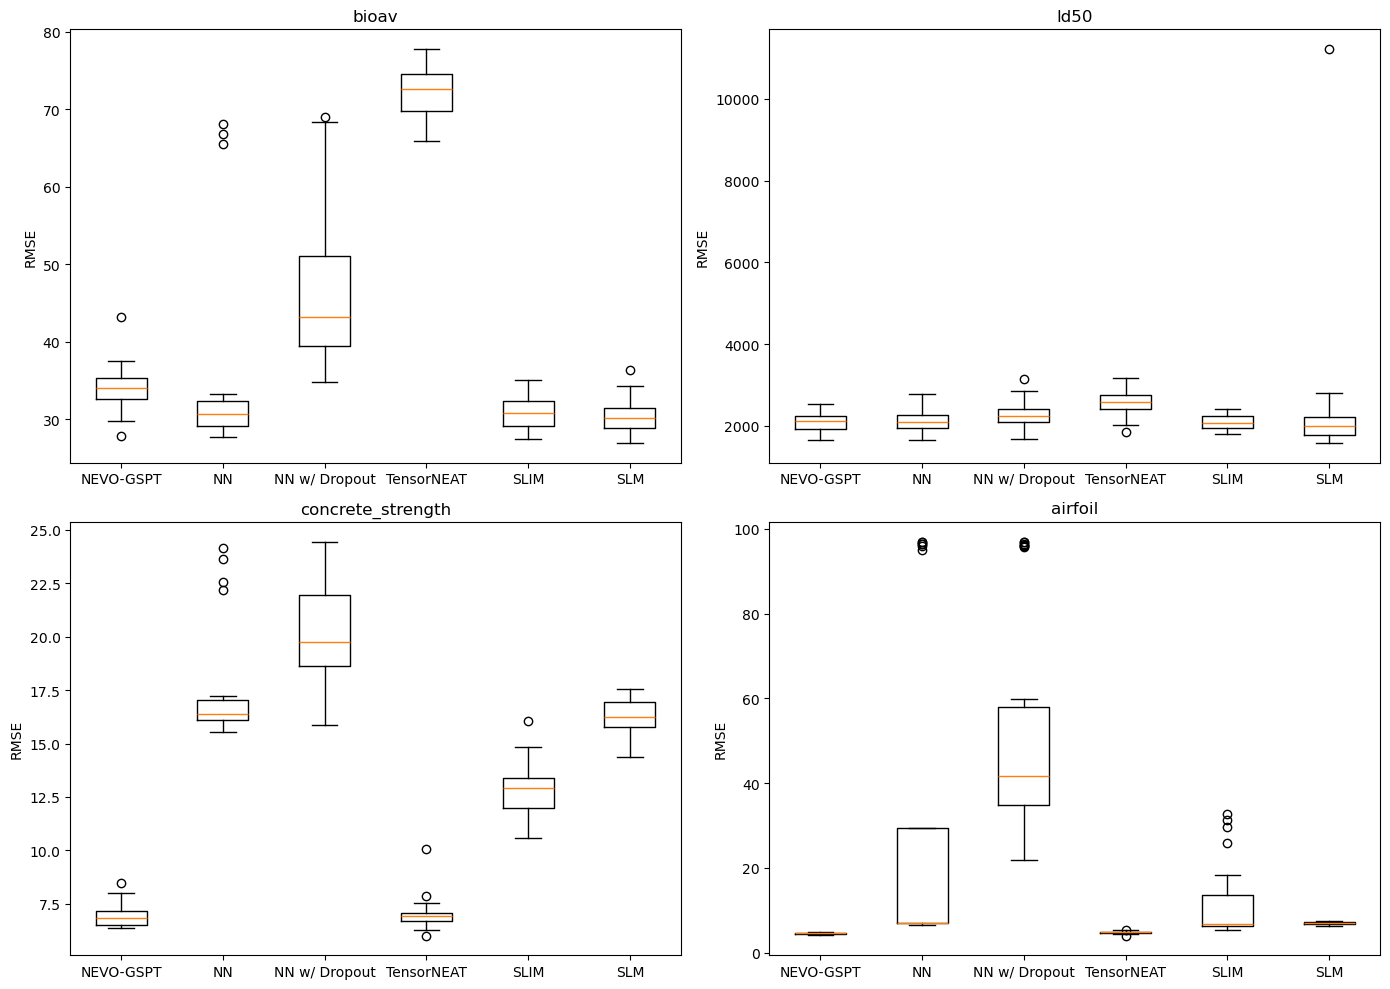

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
axes = axes.flatten()  # Flatten to access axes with a single index

for idx, dataset in enumerate(datas):
    ax = axes[idx]  # Current subplot axis
    
    # Filter data for the current dataset and generation
    filtered_data = data[(data['dataset'] == dataset) & 
                        (data['generation'] == 2000)]
    
    # Extract the specific column as 1D array
    nevo_values = filtered_data['test_fitness'].values

    baseline_values = baseline[baseline['dataset'] == dataset]['test_fitness'].values

    baseline_dropout_values = baseline_dropout[baseline_dropout['dataset'] == dataset]['test_fitness'].values
    
    # baseline_dropout_values_01 = baseline_dropout_01[baseline_dropout_01['dataset'] == dataset]['test_fitness'].values

    # Extract TensorNEAT values (fix the boolean indexing)
    tneat_values = tneat[tneat['dataset'] == dataset]['final_model_test_rmse'].values if len(tneat[tneat['dataset'] == dataset]) > 0 else None

    slim_values = f_slim[f_slim['dataset'] == dataset]['test_fitness'].values

    slm_values = slm[slm['dataset'] == dataset]['test_rmse'].values
    
    # Prepare data for boxplot (each element should be a 1D array)
    if tneat_values is not None and len(tneat_values) > 0:
        grouped = [nevo_values, baseline_values, baseline_dropout_values, tneat_values, slim_values, slm_values]
        labels = ['NEVO-GSPT', 'NN', 'NN w/ Dropout', 'TensorNEAT', 'SLIM', 'SLM']
    else:
        grouped = [nevo_values, baseline_values, baseline_dropout_values]
        labels = ['NEVO-GSPT', 'NN', 'NN w/ Dropout']
    
    ax.boxplot(grouped, labels=labels)
    ax.set_title(dataset)
    ax.set_ylabel('RMSE')

plt.tight_layout()
plt.show()

In [188]:
# slm_complete.head()

,dataset,seed,n_neurons_added_sum,parameters
0,airfoil,0,144,4224
1,airfoil,1,144,4224
2,airfoil,2,168,5216
3,airfoil,3,108,2976
4,airfoil,4,132,3776


In [193]:
tneat.columns

Index(['Duration', 'Run ID', 'Name', 'compatibility_threshold', 'dataset',
       'generations', 'max_conns', 'max_nodes', 'pop_size', 'seed',
       'species_size', 'survival_threshold', 'elite_length', 'elite_rmse',
       'elite_size', 'final_model_test_rmse', 'final_model_train_rmse',
       'hidden_layers', 'iteration_time', 'test_rmse', 'train_rmse',
       'Source Type', 'Source Name', 'User', 'Status'],
      dtype='object')

In [207]:
tneat[['dataset','elite_size', 'elite_length' ,'hidden_layers', 'max_conns']].head()

,dataset,elite_size,elite_length,hidden_layers,max_conns
0,concrete_strength,30.0,15.0,15.0,640
1,concrete_strength,30.0,14.0,14.0,640
2,concrete_strength,31.0,13.0,13.0,640
3,concrete_strength,26.0,12.0,12.0,640
4,concrete_strength,25.0,11.0,11.0,640


In [211]:
tneat.query("dataset == 'ld50'")[['dataset','hidden_layers', 'elite_size',	'elite_length', 'species_size']]

,dataset,hidden_layers,elite_size,elite_length,species_size
0,ld50,NaN,595,20,NaN
1,ld50,NaN,593,23,NaN
2,ld50,NaN,586,29,NaN
3,ld50,NaN,594,20,NaN
4,ld50,NaN,591,24,NaN
5,ld50,NaN,597,28,NaN
6,ld50,NaN,597,28,NaN
7,ld50,NaN,587,28,NaN
8,ld50,NaN,587,25,NaN
9,ld50,NaN,588,30,NaN


In [222]:
data['connections'] = data.apply(lambda x: x.parameters - (x.depth * x.width), axis = 1)

In [224]:
data['nodes'] = data.apply(lambda x: (x.depth * x.width), axis = 1)

In [225]:
data.query('generation == 2000').head()

,dataset,train_fitness,test_fitness,parameters,depth,width,seed,generation,timing,connections,nodes
2000,bioav,17.827286,33.698494,136275,486,4,0,2000,0.058479,134331,1944
4001,bioav,15.688477,32.933102,134121,460,4,1,2000,0.063008,132281,1840
6002,bioav,15.617084,34.411358,142305,487,4,2,2000,0.058496,140357,1948
8003,bioav,17.185146,32.693737,151901,539,4,3,2000,0.064698,149745,2156
10004,bioav,13.911384,34.698826,152977,565,3,4,2000,0.049728,151282,1695


In [214]:
slm_complete

,dataset,seed,n_neurons_added_sum,parameters
0,airfoil,0,144,4224
1,airfoil,1,144,4224
2,airfoil,2,168,5216
3,airfoil,3,108,2976
4,airfoil,4,132,3776
...,...,...,...,...
115,ld50,25,132,33584
116,ld50,26,156,39480
117,ld50,27,156,39480
118,ld50,28,144,36516


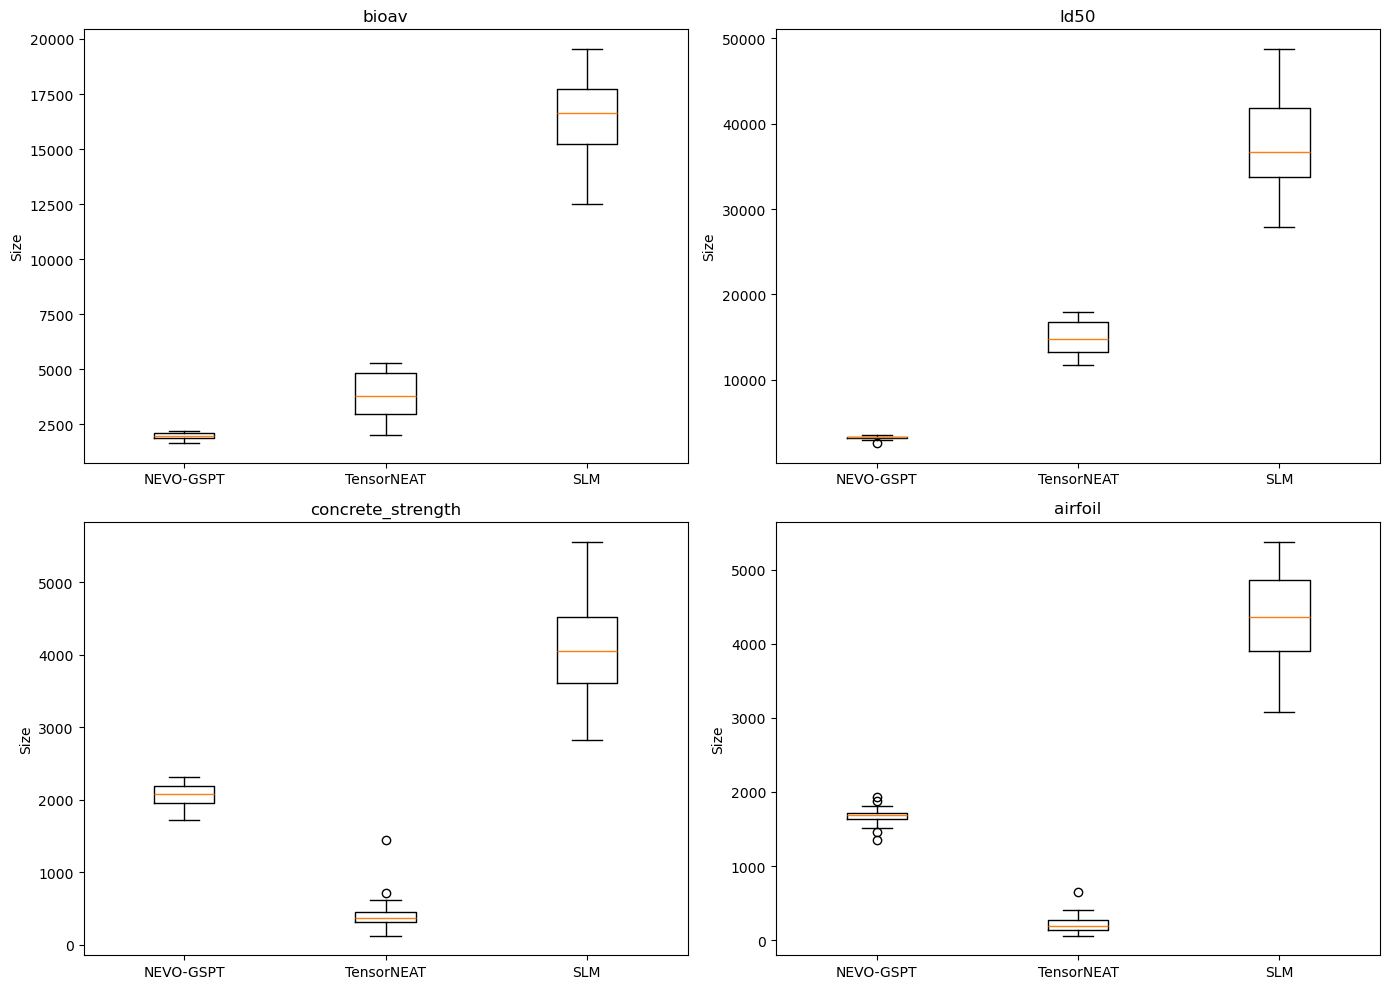

In [240]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
axes = axes.flatten()  # Flatten to access axes with a single index

for idx, dataset in enumerate(datas):
    ax = axes[idx]  # Current subplot axis
    
    # Filter data for the current dataset and generation
    filtered_data = data[(data['dataset'] == dataset) & 
                        (data['generation'] == 2000)]
    
    # Extract the specific column as 1D array
    # nevo_values = filtered_data['depth'].values * filtered_data['width'].values
    nevo_values = filtered_data['nodes'].values
    # baseline_dropout_values_01 = baseline_dropout_01[baseline_dropout_01['dataset'] == dataset]['test_fitness'].values

    # Extract TensorNEAT values (fix the boolean indexing)
    tneat_values = tneat[tneat['dataset'] == dataset]['hidden_layers'].values*tneat[tneat['dataset'] == dataset]['elite_size'].values if dataset not in  ['ld50', 'bioav'] \
                    else tneat[tneat['dataset'] == dataset]['elite_size'].values*tneat[tneat['dataset'] == dataset]['elite_length'].values

    slm_values = slm_complete[slm_complete['dataset'] == dataset]['n_neurons_added_sum'].values + slm_complete[slm_complete['dataset'] == dataset]['parameters'].values
    
    # Prepare data for boxplot (each element should be a 1D array)
    # if tneat_values is not None and len(tneat_values) > 0:
    grouped = [nevo_values, tneat_values, slm_values]
    labels = ['NEVO-GSPT',  'TensorNEAT', 'SLM']

    
    ax.boxplot(grouped, labels=labels)
    ax.set_title(dataset)
    ax.set_ylabel('Size')

plt.tight_layout()
plt.show()

In [241]:
results = {}

In [271]:
for idx, dataset in enumerate(datas):
    
    # Filter data for the current dataset and generation
    filtered_data = data[(data['dataset'] == dataset) & 
                        (data['generation'] == 2000)]
    
    # Extract the specific column as 1D array
    # nevo_values = filtered_data['depth'].values * filtered_data['width'].values
    nevo_values = filtered_data['nodes'].values if dataset != 'airfoil' else airfoil_final_g['depth'].values*airfoil_final_g['width'].values
    # baseline_dropout_values_01 = baseline_dropout_01[baseline_dropout_01['dataset'] == dataset]['test_fitness'].values

    # Extract TensorNEAT values (fix the boolean indexing)
    # Extract TensorNEAT values (fix the boolean indexing)
    tneat_values = tneat[tneat['dataset'] == dataset]['hidden_layers'].values*tneat[tneat['dataset'] == dataset]['elite_size'].values if dataset not in  ['ld50', 'bioav'] \
                    else tneat[tneat['dataset'] == dataset]['elite_size'].values*tneat[tneat['dataset'] == dataset]['elite_length'].values

    slm_values = slm_complete[slm_complete['dataset'] == dataset]['n_neurons_added_sum'].values + slm_complete[slm_complete['dataset'] == dataset]['parameters'].values

    results[dataset] = {'NEVO-GSPT' : nevo_values,
                       'TNEAT' : tneat_values,
                       'SLM' : slm_values}


In [270]:
import numpy as np
from scipy import stats
import pandas as pd

def wilcoxon_test(data_dict):
    """
    Perform Wilcoxon signed-rank test for all pairwise comparisons.
    Returns p-value matrices with algorithms as rows and columns.
    Only fills upper diagonal (above main diagonal).
    
    Parameters:
    -----------
    data_dict : dict
        Dictionary with datasets as keys, and algorithm results as nested dict
    
    Returns:
    --------
    dict of pd.DataFrame
        One p-value matrix per dataset (upper diagonal filled, scientific notation with 2 decimals)
    """
    
    results = {}
    
    for dataset_name, algorithms in data_dict.items():
        algo_names = list(algorithms.keys())
        n_algos = len(algo_names)
        
        # Initialize p-value matrix with NaN
        p_matrix = np.full((n_algos, n_algos), np.nan)
        
        # Fill only upper diagonal (i < j)
        for i in range(n_algos):
            for j in range(i + 1, n_algos):
                data1 = algorithms[algo_names[i]]
                data2 = algorithms[algo_names[j]]
                
                # Use minimum length for paired test
                min_len = min(len(data1), len(data2))
                
                # Perform Wilcoxon test
                statistic, p_value = stats.wilcoxon(
                    data1[:min_len], 
                    data2[:min_len], 
                    alternative='two-sided'
                )
                
                p_matrix[i, j] = p_value
        
        # Create DataFrame
        df = pd.DataFrame(
            p_matrix, 
            index=algo_names, 
            columns=algo_names
        )
        
        # Format to scientific notation with 2 decimal places
        df_formatted = df.applymap(lambda x: f'{x:.2e}' if pd.notna(x) and x<0.01 else np.round(x, 2))
        
        results[dataset_name] = df_formatted
    
    return results


In [272]:
for key in results.keys():
    pd.DataFrame(results[key]).to_csv(f'sizes/{key}.txt', sep = '\t', index = None)

C:\Users\dfarinati\AppData\Local\Temp\ipykernel_11052\2815863460.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_formatted = df.applymap(lambda x: f'{x:.2e}' if pd.notna(x) else np.nan)


In [273]:
stat_test = wilcoxon_test(results)
for key in stat_test.keys():
    print(stat_test[key].to_latex(caption = f'Statistical test comparing the number of nodes in the {key} dataset'))

\begin{table}
\caption{Statistical test comparing the number of nodes in the bioav dataset}
\begin{tabular}{lrll}
\toprule
 & NEVO-GSPT & TNEAT & SLM \\
\midrule
NEVO-GSPT & NaN & 1.86e-09 & 1.86e-09 \\
TNEAT & NaN & NaN & 1.86e-09 \\
SLM & NaN & NaN & NaN \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Statistical test comparing the number of nodes in the ld50 dataset}
\begin{tabular}{lrll}
\toprule
 & NEVO-GSPT & TNEAT & SLM \\
\midrule
NEVO-GSPT & NaN & 1.86e-09 & 1.73e-06 \\
TNEAT & NaN & NaN & 1.86e-09 \\
SLM & NaN & NaN & NaN \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Statistical test comparing the number of nodes in the concrete_strength dataset}
\begin{tabular}{lrll}
\toprule
 & NEVO-GSPT & TNEAT & SLM \\
\midrule
NEVO-GSPT & NaN & 1.73e-06 & 1.86e-09 \\
TNEAT & NaN & NaN & 1.86e-09 \\
SLM & NaN & NaN & NaN \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Statistical test comparing the number of nodes in the airfoil dataset

C:\Users\dfarinati\AppData\Local\Temp\ipykernel_11052\1619836359.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_formatted = df.applymap(lambda x: f'{x:.2e}' if pd.notna(x) and x<0.01 else np.round(x, 2))


In [258]:
stat_test["bioav"]

,NEVO-GSPT,TNEAT,SLM
NEVO-GSPT,NaN,1.86e-09,1.86e-09
TNEAT,NaN,NaN,1.86e-09
SLM,NaN,NaN,NaN


% This file was created with matplot2tikz v0.3.2.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{darkorange25512714}{RGB}{255,127,14}

\begin{groupplot}[group style={group size=2 by 2}]
\nextgroupplot[
tick align=outside,
tick pos=left,
title={bioav},
x grid style={darkgray176},
xmin=0.5, xmax=4.5,
xtick style={color=black},
xtick={1,2,3,4},
xticklabels={NEVO-GSPT,NN,NN w/ Dropout,TensorNEAT},
y grid style={darkgray176},
ylabel={RMSE},
ymin=25.2187547682163, ymax=80.2709341081802,
ytick style={color=black}
]
\addplot [black]
table {%
0.775 32.5739231109619
1.225 32.5739231109619
1.225 35.3645458221436
0.775 35.3645458221436
0.775 32.5739231109619
};
\addplot [black]
table {%
1 32.5739231109619
1 29.7070045471191
};
\addplot [black]
table {%
1 35.3645458221436
1 37.519474029541
};
\addplot [black]
table {%
0.8875 29.7070045471191
1.1125 29.7070045471191
};
\addplot [black]
table {%
0.8875 37.519474029541
1.1125 37.519474029541
};
\addplot [black, mark=o, m

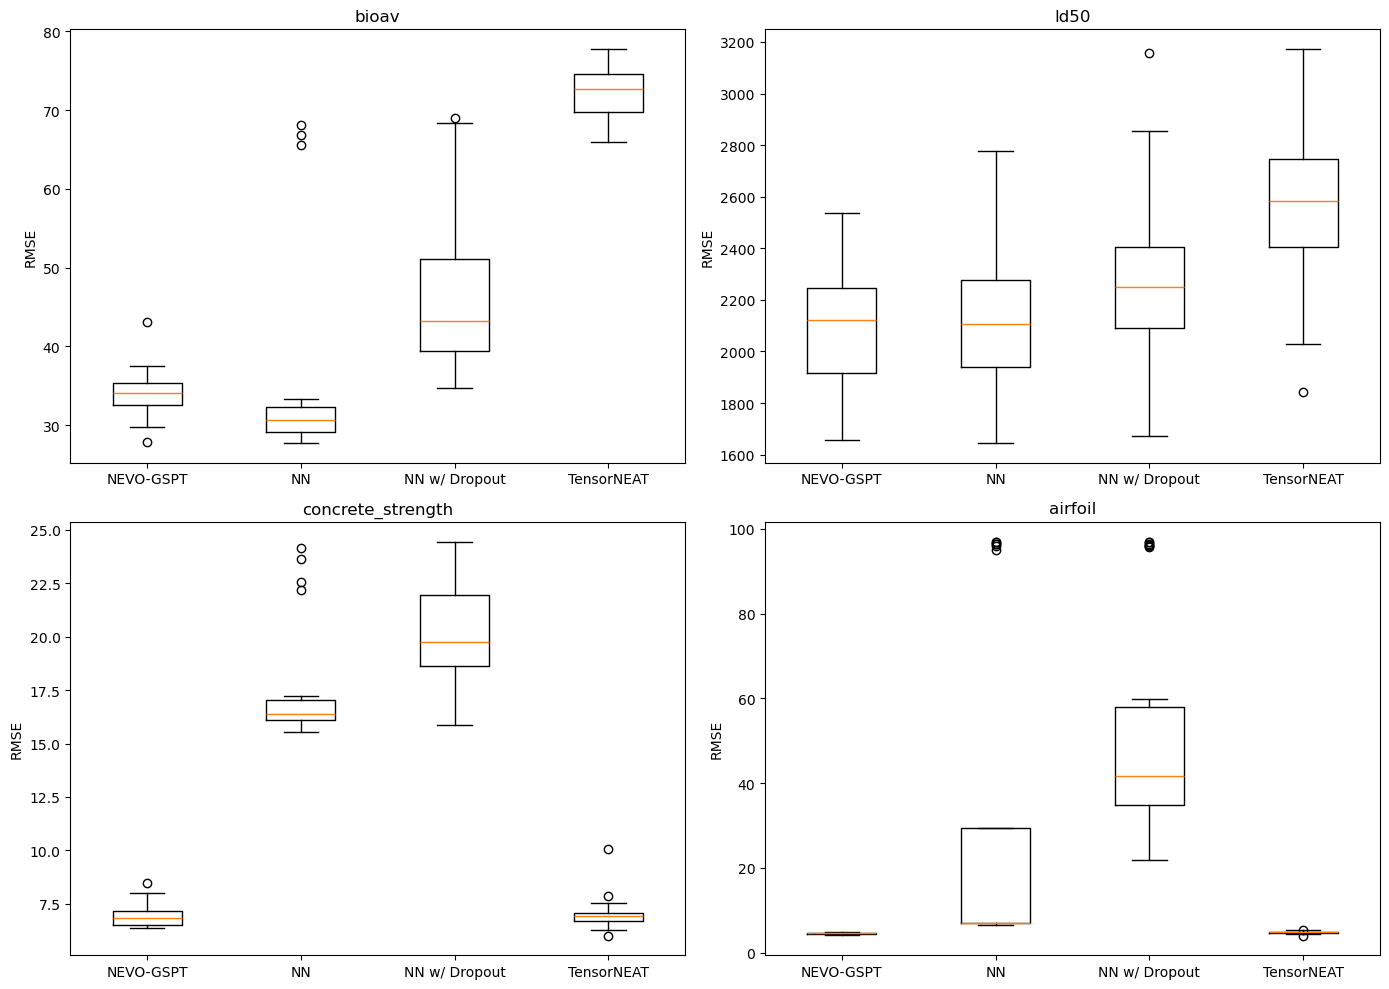

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
axes = axes.flatten()  # Flatten to access axes with a single index

for idx, dataset in enumerate(datas):
    ax = axes[idx]  # Current subplot axis
    
    # Filter data for the current dataset and generation
    filtered_data = data[(data['dataset'] == dataset) & 
                        (data['generation'] == 2000)]
    
    # Extract the specific column as 1D array
    nevo_values = filtered_data['test_fitness'].values

    baseline_values = baseline[baseline['dataset'] == dataset]['test_fitness'].values

    baseline_dropout_values = baseline_dropout[baseline_dropout['dataset'] == dataset]['test_fitness'].values

    # Extract TensorNEAT values (fix the boolean indexing)
    tneat_values = tneat[tneat['dataset'] == dataset]['final_model_test_rmse'].values if len(tneat[tneat['dataset'] == dataset]) > 0 else None
    
    # Prepare data for boxplot (each element should be a 1D array)
    if tneat_values is not None and len(tneat_values) > 0:
        grouped = [nevo_values, baseline_values, baseline_dropout_values, tneat_values]
        labels = ['NEVO-GSPT', 'NN', 'NN w/ Dropout', 'TensorNEAT']
    else:
        grouped = [nevo_values, baseline_values, baseline_dropout_values]
        labels = ['NEVO-GSPT', 'NN', 'NN w/ Dropout']
    
    ax.boxplot(grouped, labels=labels)
    ax.set_title(dataset)
    ax.set_ylabel('RMSE')

plt.tight_layout()
# plt.show()
print(matplot2tikz.get_tikz_code())